In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve


##Data importing and cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def read_data(file_path):
    df = pd.read_csv(file_path)
    return df

Nasa_df=read_data("/content/drive/MyDrive/MLSC grad_project_1/nearest-earth-objects(1910-2024).csv")

##ُEDA

In [ ]:
Nasa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [ ]:
Nasa_df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [ ]:
##Check for missing values
def check_missing_values(df):
    missing_values = df.isnull().sum()
    return missing_values

missing_values = check_missing_values(Nasa_df)
print(missing_values)

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64


In [ ]:
##Remove duplicates IN neo_id
from re import sub
def remove_duplicates(df,column):
    df = df.drop_duplicates(subset=column)
    return df

Nasa_df = remove_duplicates(Nasa_df,'neo_id')

In [ ]:
##check the null value
def check_null_rows(df):
  null_mask = df.isnull().any(axis=1)
  null_rows = df[null_mask]
  return null_rows

null_rows = check_null_rows(Nasa_df)
null_rows



,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
107508,3511355,(2010 DJ77),NaN,NaN,NaN,Earth,69599.619497,4.163668e+07,False
274352,3592397,(2010 AW108),NaN,NaN,NaN,Earth,22559.617403,5.149683e+07,False
274626,54049909,(2010 CJ188),NaN,NaN,NaN,Earth,61048.333919,4.631794e+07,False


In [ ]:
Nasa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33514 entries, 0 to 338197
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   absolute_magnitude      33514 non-null  float64
 1   estimated_diameter_min  33514 non-null  float64
 2   estimated_diameter_max  33514 non-null  float64
 3   relative_velocity       33514 non-null  float64
 4   miss_distance           33514 non-null  float64
 5   is_hazardous            33514 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 1.6 MB


In [ ]:
## fill the null values
def fill_null_values(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
    return df

Nasa_df = fill_null_values(Nasa_df)




In [ ]:
## drop unecessary columns
def drop_columns(df, columns):
    df = df.drop(columns, axis=1)
    return df

columns= ['orbiting_body',  'neo_id', 'name']


In [ ]:
Nasa_df=drop_columns(Nasa_df,columns)

In [ ]:
## identify target columns
def identify_target_column(df):
    target_column = df.columns[-1]
    return target_column

target_column = identify_target_column(Nasa_df)
target_column

'is_hazardous'

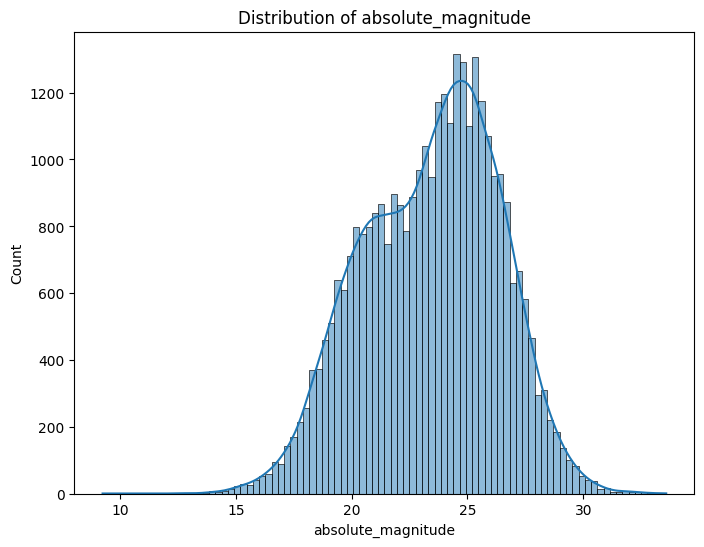

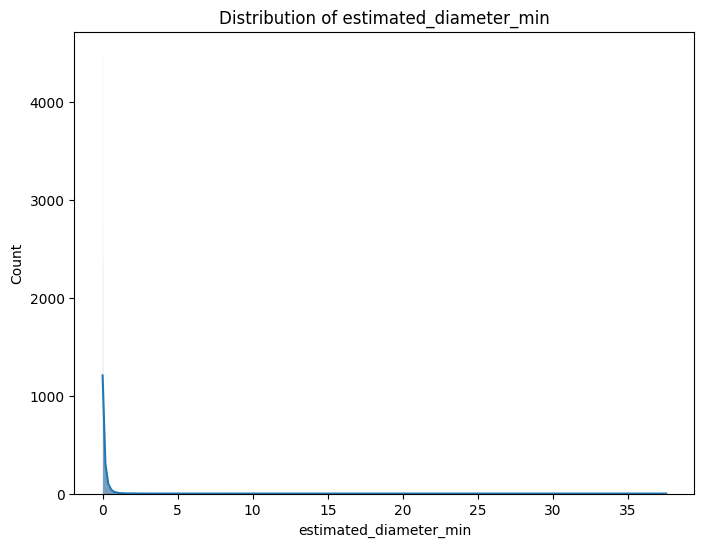

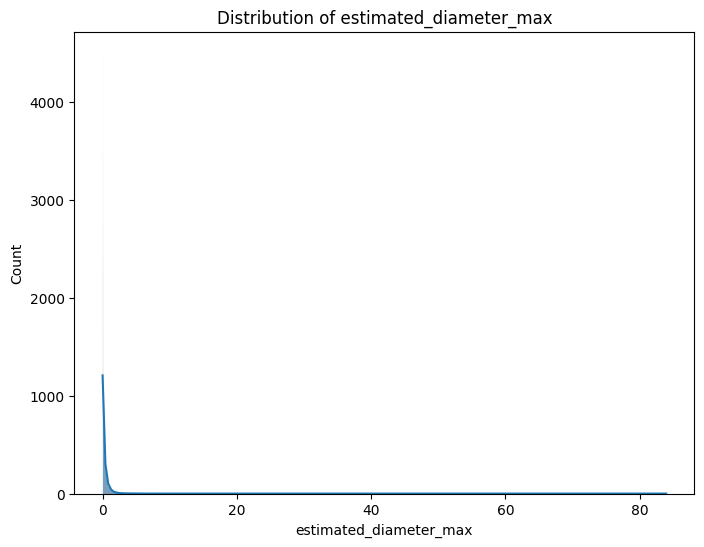

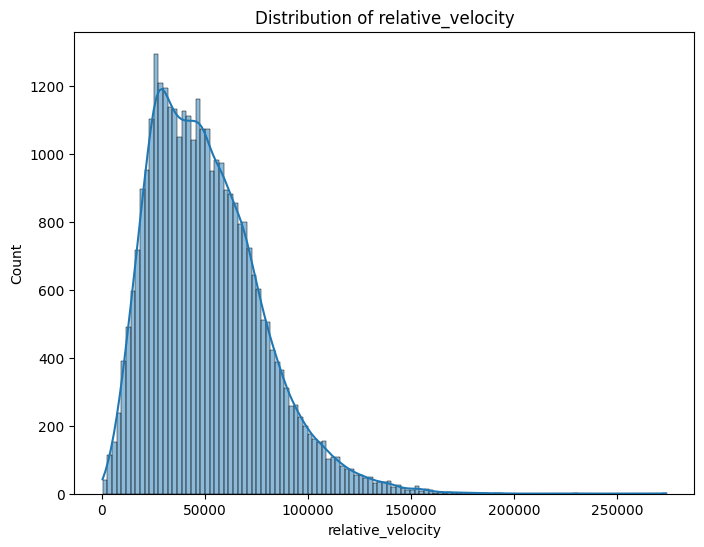

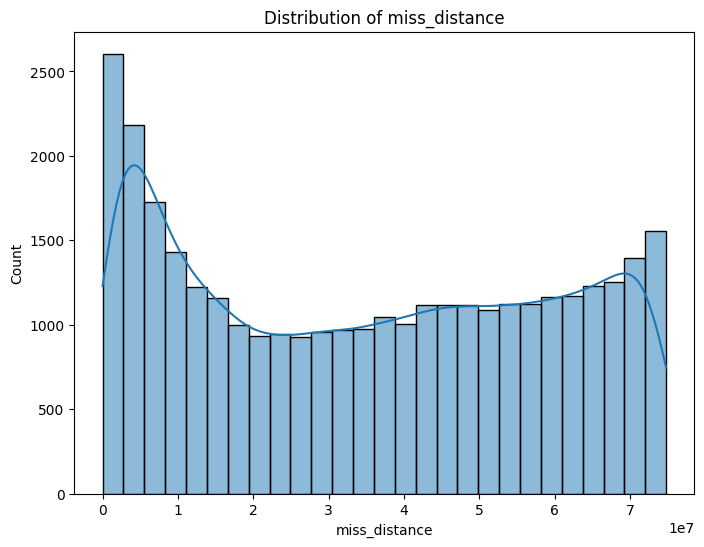

In [ ]:
### Function to plot histograms for numerical columns
def plot_histograms(df, columns):
    for col in columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

# Numerical columns
numerical_columns = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']

# Plot histograms
plot_histograms(Nasa_df, numerical_columns)

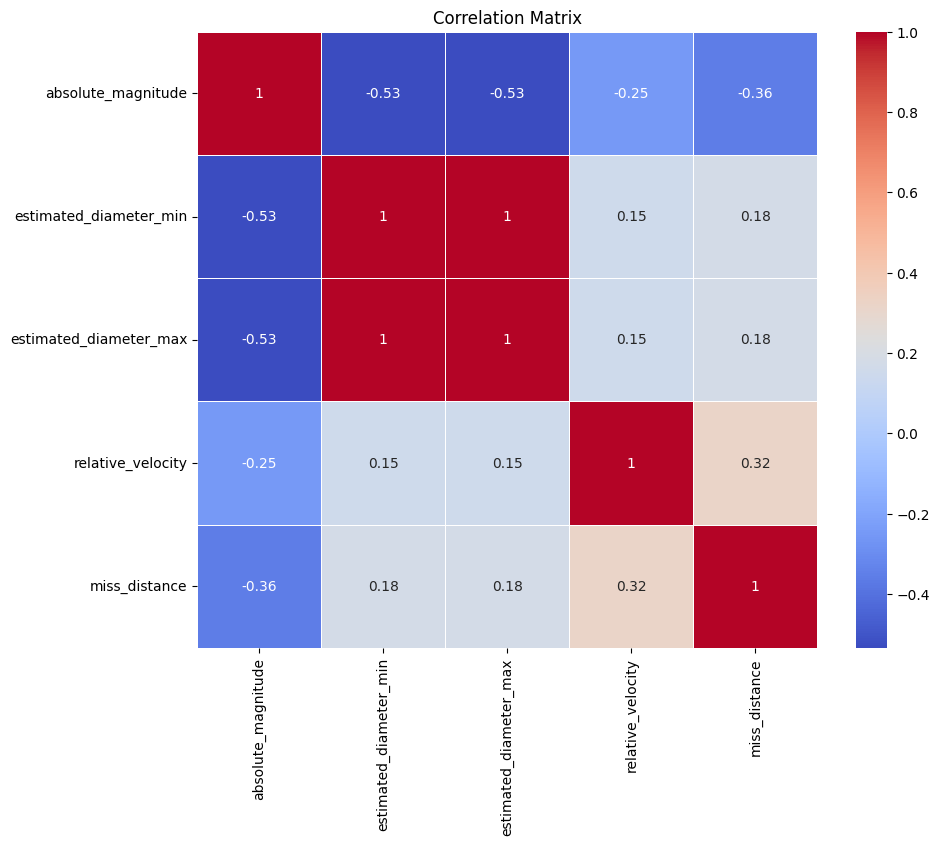

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
absolute_magnitude,1.00000,-0.53415,-0.53415,NaN,NaN
estimated_diameter_min,-0.53415,1.00000,1.00000,NaN,NaN
estimated_diameter_max,-0.53415,1.00000,1.00000,NaN,NaN
relative_velocity,NaN,NaN,NaN,1.0,NaN
miss_distance,NaN,NaN,NaN,NaN,1.0


In [ ]:
## correlation matrix
"""
first :wee get the numerical columns from the dataset

second :wee calculate the correlation matrix using the corr() function
third :we visulize the correlation matrix using the heatmap from the seaborn library
fourth :show the strong correlations between the columns


"""
def get_numerical_columns(df):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    return numerical_columns

def calculate_correlation_matrix(df):
    numerical_columns = get_numerical_columns(df)
    correlation_matrix = df[numerical_columns].corr()
    return correlation_matrix

correlation_matrix = calculate_correlation_matrix(Nasa_df)
correlation_matrix

def visulize_correlation_matrix(correlation_matrix):
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.show()

visulize_correlation_matrix(correlation_matrix)

def show_strong_correlations(correlation_matrix, threshold=0):
    strong_correlations = correlation_matrix.where(abs(correlation_matrix) > threshold)
    strong_correlations = strong_correlations.dropna(axis=0, how='all').dropna(axis=1, how='all')
    return strong_correlations

strong_correlations = show_strong_correlations(correlation_matrix, threshold=0.5)
strong_correlations

##2.4. Plotting
Plots were created in order to gain a different perspective on values and provide visuality.

NameError: name 'path_effects' is not defined

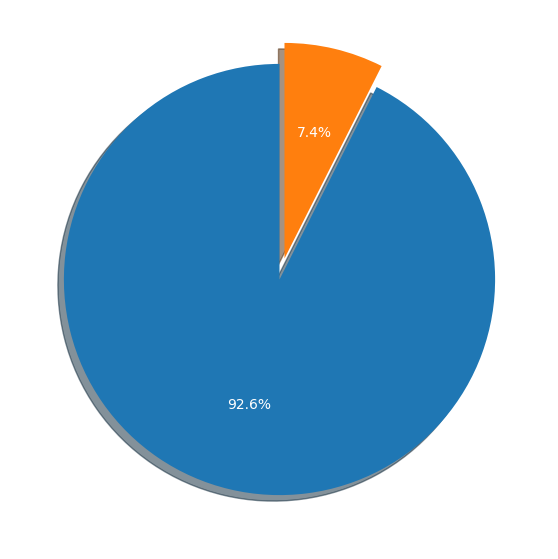

In [ ]:
##
explode = (0, 0.1)
fig = plt.figure(figsize = (7, 7), facecolor='w')
out_df=pd.DataFrame(Nasa_df.groupby(target_column)[target_column].count())

patches, texts, autotexts = plt.pie(out_df[target_column], autopct='%1.1f%%',
                                    textprops={'color': "w"},
                                    explode=explode,
                                    startangle=90, shadow=True)

for patch in patches:
    patch.set_path_effects({path_effects.Stroke(linewidth=2.5,
                                                foreground='w')})

plt.legend(labels=['False','True'], bbox_to_anchor=(1., .95))
plt.title('Dependent Variables Distribution')
# plt.savefig('gender_pie')
plt.show()

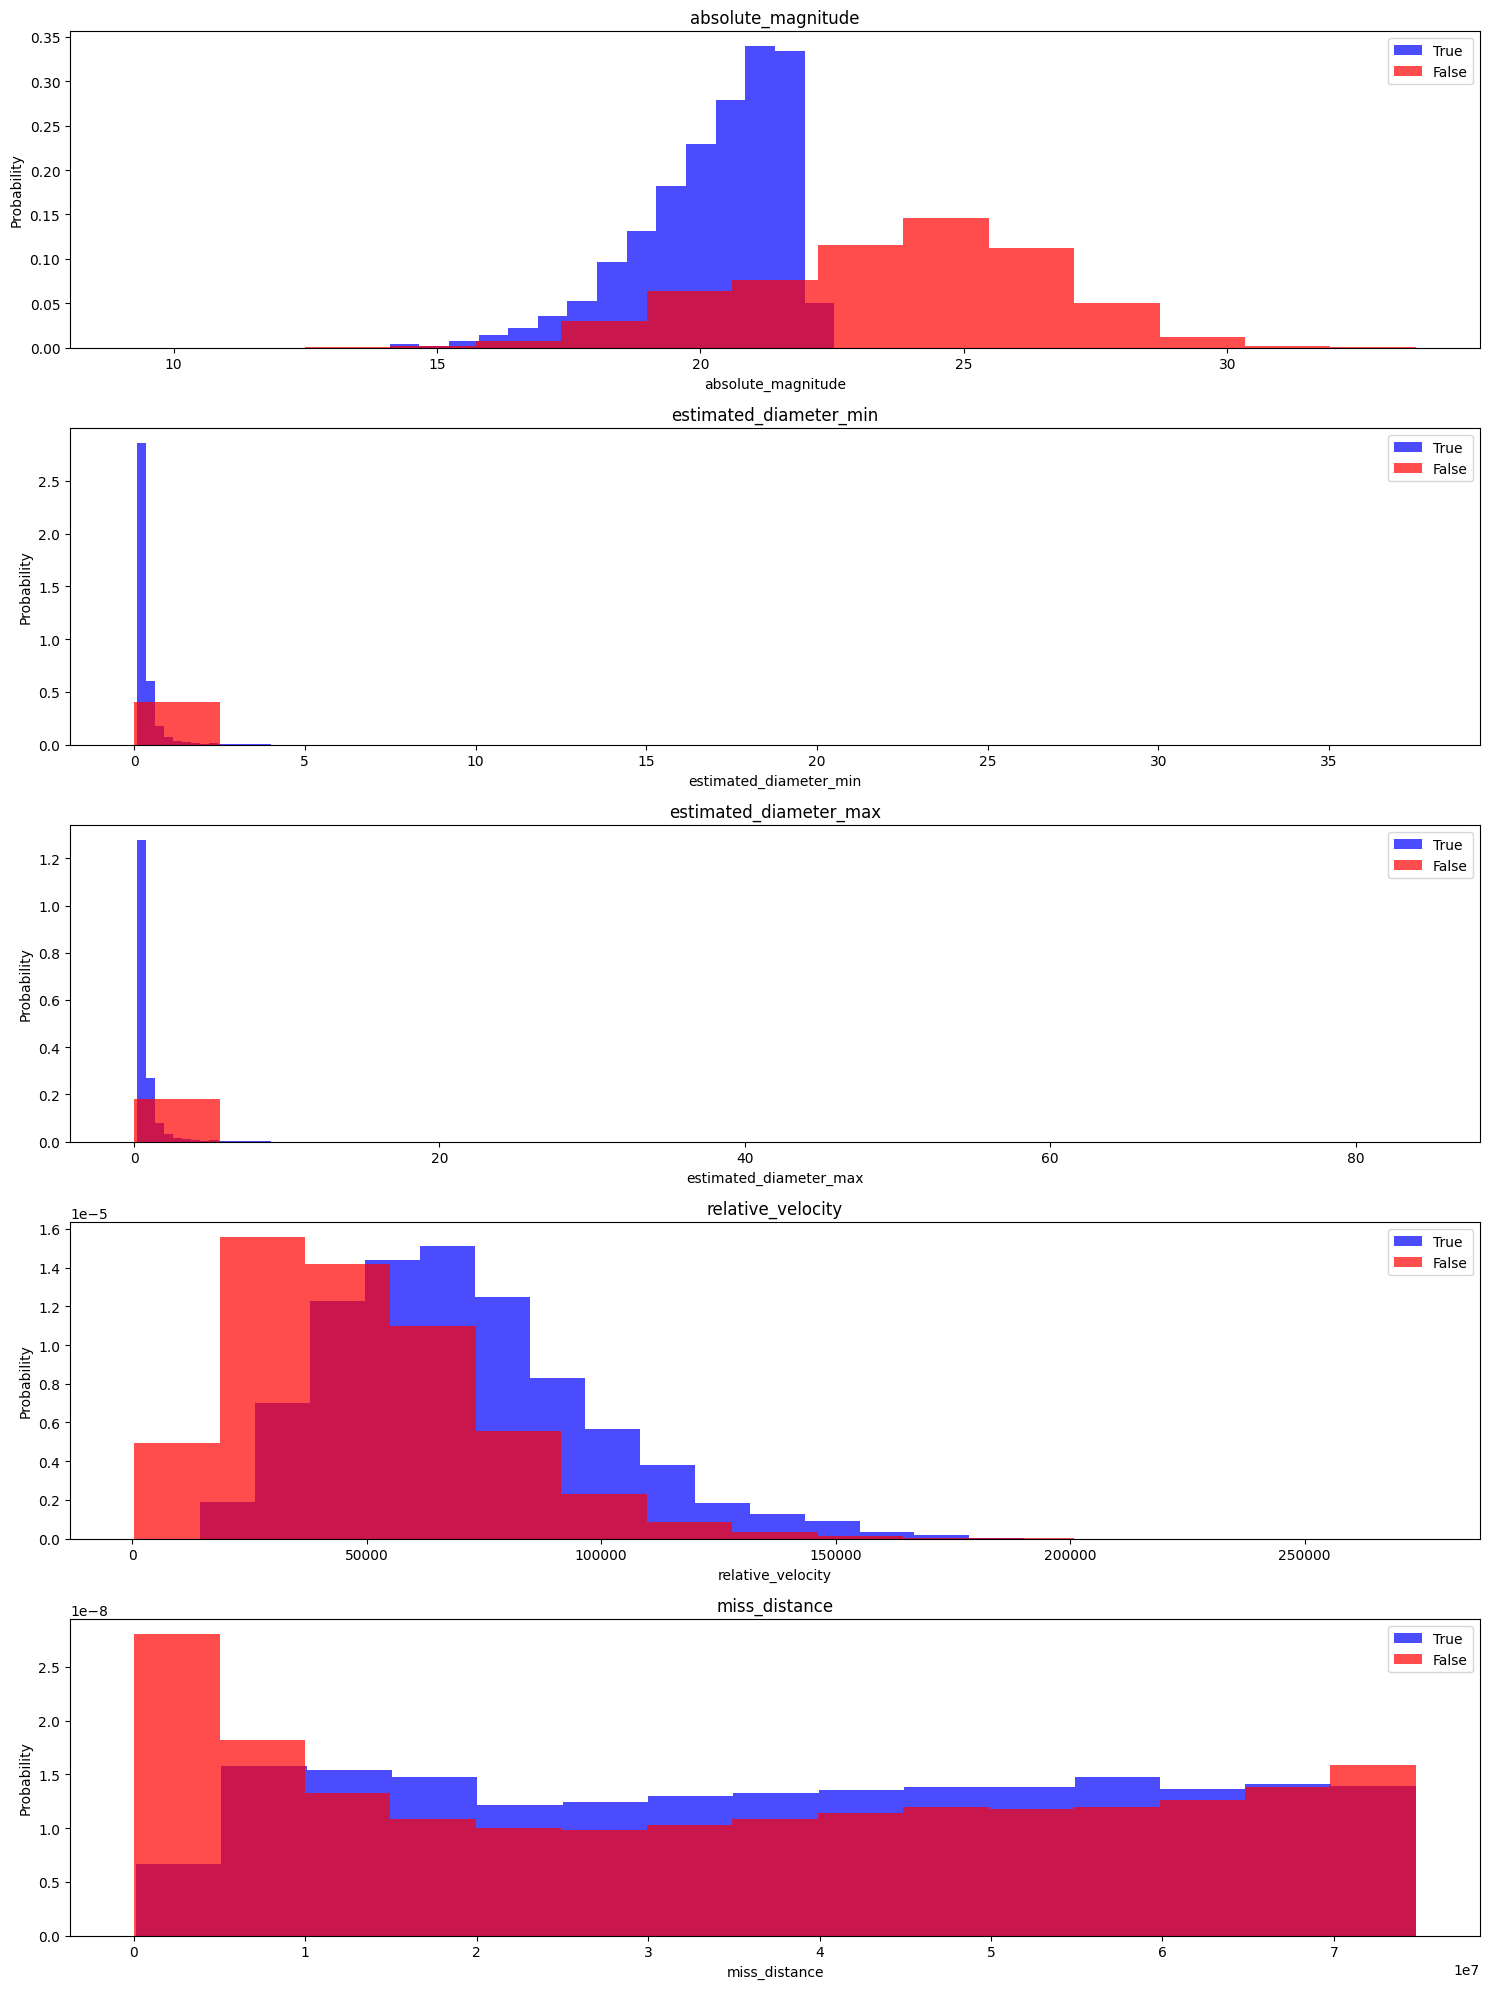

In [ ]:
rows_to_plot = Nasa_df.columns[:5]

plt.figure(figsize=(15, 20))
for i, label in enumerate(rows_to_plot, 1):
    plt.subplot(len(rows_to_plot), 1, i)
    plt.hist(Nasa_df[Nasa_df[target_column] == 1][label], color='blue', label="True", alpha=0.7, density=True, bins=15)
    plt.hist(Nasa_df[Nasa_df[target_column] == 0][label], color='red', label="False", alpha=0.7, density=True, bins=15)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()

plt.tight_layout()
plt.show()

##label encoding


In [ ]:
def encode_labels(target_column):
  LabelEncoder= preprocessing.LabelEncoder()
  Nasa_df[target_column]=LabelEncoder.fit_transform(Nasa_df[target_column])
  return Nasa_df

Nasa_df=encode_labels(target_column)
Nasa_df


,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous,labels
0,19.140,0.394962,0.883161,71745.401048,5.814362e+07,0,0
1,18.500,0.530341,1.185878,109949.757148,5.580105e+07,1,1
2,21.450,0.136319,0.304818,24865.506798,6.720689e+07,0,0
3,20.630,0.198863,0.444672,78890.076805,3.039644e+07,0,0
4,22.700,0.076658,0.171412,56036.519484,6.311863e+07,0,0
...,...,...,...,...,...,...,...
338166,24.866,0.028272,0.063218,38881.858752,1.640905e+06,0,0
338167,26.356,0.014235,0.031830,21999.325933,9.886132e+06,0,0
338168,23.781,0.046597,0.104193,16846.868427,3.350483e+07,0,0
338186,23.218,0.060389,0.135033,23763.806822,3.590212e+07,0,0


## start build model and choose the best one of them

In [ ]:
## identify the features and target
def identify_model_elements(df):
    features = df.drop(target_column, axis=1)
    target = df[target_column]
    return features, target
X=identify_model_elements(Nasa_df)[0]
y=identify_model_elements(Nasa_df)[1]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

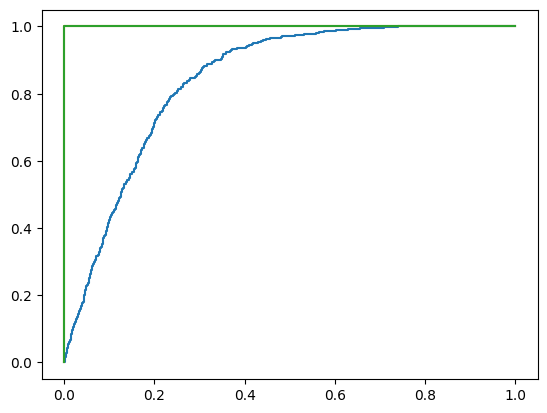

In [ ]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Store results
    results[model_name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': roc_auc
    }
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')


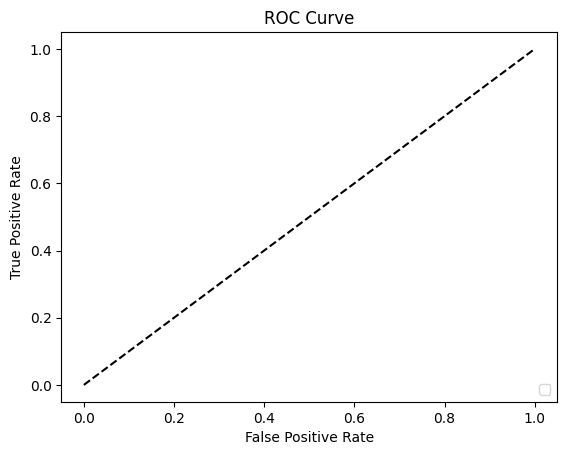

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Print results
for model_name, metrics in results.items():
    print(f'{model_name}:')
    for metric_name, value in metrics.items():
        print(f'  {metric_name}: {value:.4f}')

Logistic Regression:
  Precision: 0.3871
  Recall: 0.0237
  F1-Score: 0.0446
  AUC-ROC: 0.8426
Random Forest:
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  AUC-ROC: 1.0000
Gradient Boosting:
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
  AUC-ROC: 1.0000
